<a href="https://colab.research.google.com/github/radhakrishnan-omotec/avm-repository/blob/master/Session_10b_zero_shot_object_detection_with_yolo_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection with YOLO-World
<br>
<hr>

- YOLO-World was designed to solve a limitation of existing zero-shot object detection models: speed.
- Whereas other state-of-the-art models use Transformers, a powerful but typically slower architecture, YOLO-World uses the faster CNN-based YOLO architecture.

![visualization results of referring object detection](https://storage.googleapis.com/com-roboflow-marketing/supervision/cookbooks/yolo-world-visualization-results-of-referring-object-detection.png)

<hr>

In [1]:
!nvidia-smi

Fri Mar  1 05:30:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

- The command !nvidia-smi is typically used in environments where NVIDIA GPU drivers are installed.

- It is a command-line utility provided by NVIDIA to monitor and manage NVIDIA GPU devices installed on the system.

- nvidia-smi: It stands for "NVIDIA System Management Interface". When executed, it displays detailed information about the currently installed NVIDIA GPUs, including their utilization, memory usage, temperature, power usage, and more.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


- import os: This line imports the Python built-in module os, which provides a way to interact with the operating system, such as navigating the file system, working with files and directories, and accessing environment variables.

- HOME = os.getcwd(): This line calls the os.getcwd() function. getcwd() stands for "get current working directory". It returns a string representing the current working directory of the Python script that is being executed. This directory is typically the location from which the script was launched.

- print(HOME): This line prints out the value of the variable HOME, which now holds the path of the current working directory.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installing required packages

Here, we utilize two Python packages: `inference`, for executing zero-shot object detection using YOLO-World, and `supervision`, for post-processing and visualizing the detected objects.

In [4]:
!pip install -q inference-gpu[yolo-world]==0.9.12rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

- !pip: This tells the Python interpreter to run the following command using pip, which is a package manager for Python.

- install: This is the pip command to install packages.

- -q: This flag stands for quiet mode, which suppresses output during installation.

- inference-gpu[yolo-world]==0.9.12rc1: This is the package name along with the specified version you want to install. It includes the inference-gpu package with the YOLO World extension at version 0.9.12rc1.

In [5]:
!pip install -q supervision==0.19.0rc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.0 MB/s eta 0:00:00


- supervision is a library developed by roboflow which is used for several computer vision tasks

## Imports

In [6]:
import cv2
import supervision as sv

from tqdm import tqdm
from inference.models.yolo_world.yolo_world import YOLOWorld

[03/01/24 05:33:26] WARNING  Your inference package version 0.9.12rc1 is out of date! Please upgrade ]8;id=285035;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=571745;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py#35\35]8;;\
                             to version 0.9.15 of inference for the latest features and bug fixes by               
                             running `pip install --upgrade inference`.                                            

- cv2: This is the OpenCV library, which is commonly used for image processing tasks such as reading, writing, and manipulating images.

- supervision as sv: This imports the supervision package and gives it the alias sv. supervision is a set of easy-to-use utils that will come in handy in any Computer Vision project.

- from tqdm import tqdm: This imports the tqdm module, which provides a progress bar for iterables like loops and iterators. It's often used to visualize the progress of tasks in a loop.

- from inference.models.yolo_world.yolo_world import YOLOWorld: This imports the YOLOWorld class from the inference.models.yolo_world.yolo_world module. We're working with a YOLO (You Only Look Once) model for object detection, specifically from the inference package.

In [7]:
!wget -P {HOME} -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -P {HOME} -q https://media.roboflow.com/supervision/cookbooks/yellow-filling.mp4

In [8]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"
SOURCE_VIDEO_PATH = f"{HOME}/yellow-filling.mp4"

- SOURCE_IMAGE_PATH: This variable holds the file path to an image named "peoples-755726_1280.jpg". The path is constructed by combining the HOME variable, which represents the current working directory, with the image filename.

- SOURCE_VIDEO_PATH: This variable holds the file path to a video named "yellow-filling.mp4". Similar to the image path, it's constructed by combining the HOME variable with the video filename.

- The Inference package provides the YOLO-World model in three versions: `S`, `M`, and `L`. You can load them by defining model_id as `yolo_world/s`, `yolo_world/m`, and `yolo_world/l`, respectively. The `ROBOFLOW_API_KEY` is not required to utilize this model.







In [9]:
model = YOLOWorld(model_id="yolo_world/l")

- Zero-shot learning is a paradigm in machine learning where a model is trained to recognize classes it has never seen during training. In the context of computer vision, a zero-shot model is a model that can identify objects or classes that it has not been explicitly trained on.

YOLO-World is a zero-shot model, enabling object detection without any training. You only need to define a prompt as a list of classes (things) you are searching for.

In [10]:
classes = ["person", "backpack", "dog", "eye", "nose", "ear", "tongue", "car", "traffic lights"]
model.set_classes(classes)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 52.5MiB/s]


- classes = ["person", "backpack", "dog", "eye", "nose", "ear", "tongue"]: This line creates a list named classes containing strings representing different classes or categories. In this case, it seems to include classes like "person", "backpack", "dog", "eye", "nose", "ear", and "tongue". Each string corresponds to a specific object class that the model is trained to detect.

- model.set_classes(classes): This line calls the set_classes() method on the model object, passing the list of classes as an argument. This method is likely part of the model's API and is used to set the classes that the model should recognize during inference. By setting the classes, you're informing the model about the types of objects it should expect to detect in the input data.

In [11]:
image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.infer(image)
detections = sv.Detections.from_inference(results)

- image = cv2.imread(SOURCE_IMAGE_PATH): This line uses OpenCV's imread() function to load an image from the file path specified by SOURCE_IMAGE_PATH. The loaded image is stored in the image variable.

- results = model.infer(image): This line runs inference on the loaded image using the model. The infer() method is likely part of the model's API and is used to perform inference, which involves detecting objects or making predictions on the input image. The results of the inference are stored in the results variable.

- detections = sv.Detections.from_inference(results): This line creates detections from the inference results using the from_inference() method of the Detections class in the sv package. These detections likely include information about the detected objects in the image, such as their bounding boxes, class labels, and confidence scores. The resulting detections are stored in the detections variable.

In [12]:
BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)

- BOUNDING_BOX_ANNOTATOR: This annotator is initialized with a BoundingBoxAnnotator object, which likely is used to draw bounding boxes around detected objects. It is configured with a thickness of 2 pixels for the bounding box lines.

- LABEL_ANNOTATOR: This annotator is initialized with a LabelAnnotator object, which is likely used to add text labels to annotations. It is configured with a text thickness of 2, a text scale of 1, and the text color is set to black (sv.Color.BLACK).

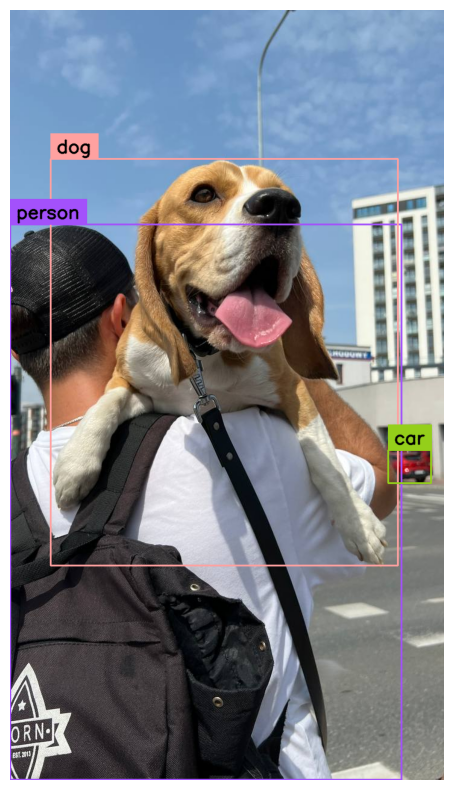

In [13]:
annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

- annotated_image = image.copy(): This line creates a copy of the original image to avoid modifying the original data. The copy is stored in the variable annotated_image.

- annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections): This line annotates the copied image with bounding boxes using the BOUNDING_BOX_ANNOTATOR object and the detections data. It adds bounding boxes around detected objects to the annotated_image.

- annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections): This line adds labels to the annotated image using the LABEL_ANNOTATOR object and the detections data. It labels detected objects with their class names.

- sv.plot_image(annotated_image, (10, 10)): This line plots the annotated image using the plot_image function from the supervision package. It displays the annotated image with a specified size of (10, 10).

## Adjusting Confidence Level

- Note that many classes from our prompt were not detected. This is because the default confidence threshold in Inference is set to `0.5`. Let's try significantly lowering this value.

In [14]:
image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.infer(image, confidence=0.003)
detections = sv.Detections.from_inference(results)

- image = cv2.imread(SOURCE_IMAGE_PATH): This line loads an image from the file path specified by SOURCE_IMAGE_PATH using OpenCV's imread() function and stores it in the image variable.

- results = model.infer(image, confidence=0.003): This line runs inference on the loaded image using the infer() method of the model object. It passes the image data to the model for inference and specifies a confidence threshold of 0.003. This threshold likely determines which detections are considered valid based on their confidence scores.

- detections = sv.Detections.from_inference(results): This line creates detections from the inference results using the from_inference() method of the Detections class in the sv package. These detections likely include information about the detected objects in the image, such as their bounding boxes, class labels, and confidence scores.

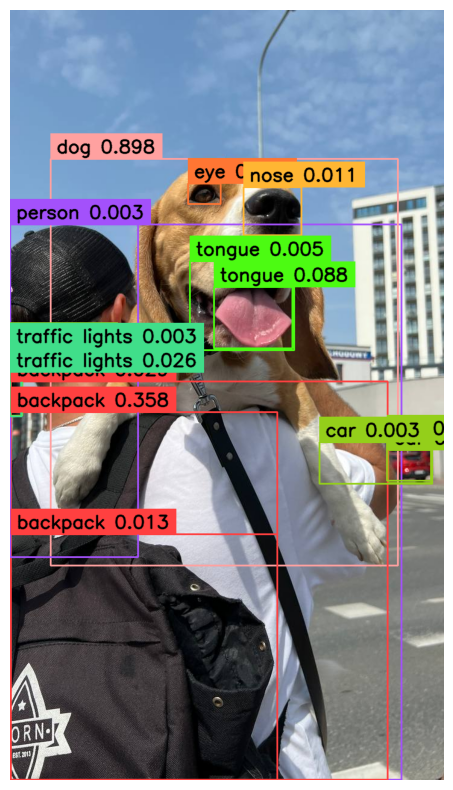

In [15]:
labels = [
    f"{classes[class_id]} {confidence:0.3f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections, labels=labels)
sv.plot_image(annotated_image, (10, 10))

- labels = [...]: This list comprehension generates labels for each detected object. It iterates over pairs of class IDs and confidence scores obtained from detections, combines them into strings in the format "class_name confidence_score" with three decimal places, and stores them in the labels list.

- annotated_image = image.copy(): This line creates a copy of the original image to avoid modifying it directly. The copied image is stored in the variable annotated_image.

- annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections): This line annotates the copied image with bounding boxes using the BOUNDING_BOX_ANNOTATOR object and the detections data. It adds bounding boxes around detected objects to the annotated_image.

- annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections, labels=labels): This line adds labels to the annotated image using the LABEL_ANNOTATOR object, the detections data, and the generated labels. It labels detected objects with their class names and confidence scores.

- sv.plot_image(annotated_image, (10, 10)): This line plots the annotated image using the plot_image function from the supervision package. It displays the annotated image with a specified size of (10, 10).

## Using Non-Max Suppression (NMS) to Eliminate Double Detections

To eliminate duplicates, we will use Non-Max Suppression (NMS). NMS evaluates the extent to which detections overlap using the Intersection over Union metric and, upon exceeding a defined threshold, treats them as duplicates. Duplicates are then discarded, starting with those of the lowest confidence. The value should be within the range `[0, 1]`. The smaller the value, the more restrictive the NMS.







In [16]:
image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.infer(image, confidence=0.003)
detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)

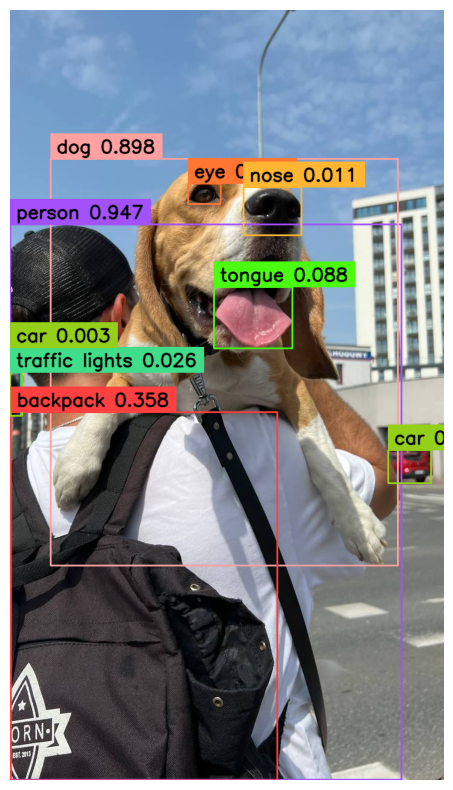

In [17]:
labels = [
    f"{classes[class_id]} {confidence:0.3f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections, labels=labels)
sv.plot_image(annotated_image, (10, 10))

## Video Processing

The [`get_video_frames_generator`](https://supervision.roboflow.com/latest/utils/video/#supervision.utils.video.get_video_frames_generator) enables us to easily iterate over video frames. Let's create a video generator for our sample input file and display its first frame on the screen.

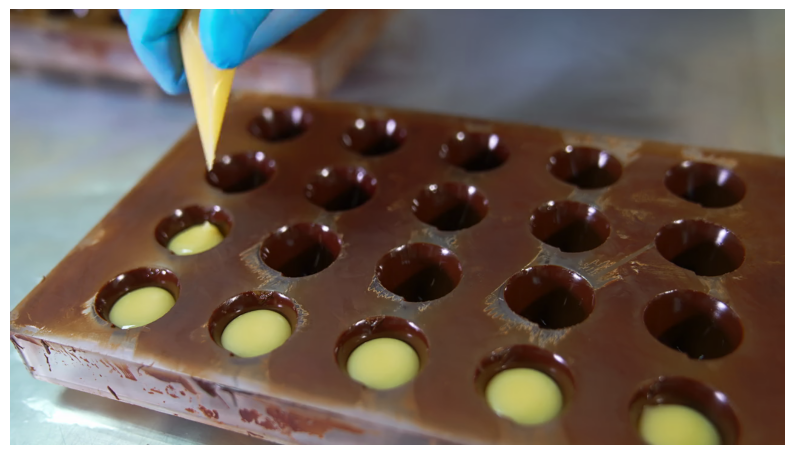

In [18]:
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(generator)

sv.plot_image(frame, (10, 10))

Let's update our list of classes. This time we are looking for `yellow filling`. The rest of the code performing detection, filtering and visualization remains unchanged.

In [19]:
classes = ["yellow filling"]
model.set_classes(classes)

In [20]:
results = model.infer(frame, confidence=0.002)
detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)

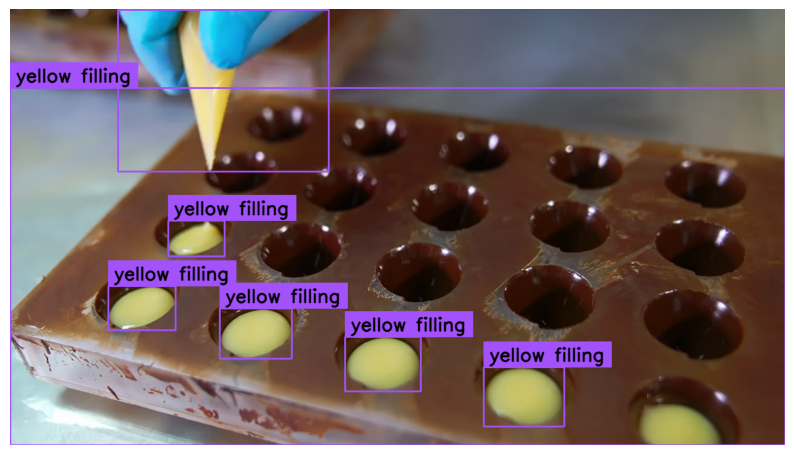

In [21]:
annotated_image = frame.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

## Filtering Detections by Area

Our prompt allowed us to locate all filled holes, but we also accidentally marked the entire high-level element. To address this issue, we'll filter detections based on their relative area in relation to the entire video frame. If a detection occupies more than 10% of the frame's total area, it will be discarded.

We can use [`VideoInfo.from_video_path`](https://supervision.roboflow.com/develop/utils/video/#supervision.utils.video.VideoInfo) to learn basic information about our video, such as duration, resolution, or FPS.

In [22]:
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_info

VideoInfo(width=1280, height=720, fps=25, total_frames=442)

Knowing the frame's resolution allows us to easily calculate its total area, expressed in pixels.

In [23]:
width, height = video_info.resolution_wh
frame_area = width * height
frame_area

921600

On the other hand, by using [`sv.Detections.area`](https://supervision.roboflow.com/develop/detection/core/#supervision.detection.core.Detections.area) property, we can learn the area of each individual bounding box.

In [24]:
results = model.infer(frame, confidence=0.002)
detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)
detections.area

array([ 7.5408e+05,       92844,       11255,       12969,      9875.9,      8007.7,      5433.5])

Now, we can combine these two pieces of information to construct a filtering condition for detections with an area greater than 10% of the entire frame.

In [25]:
(detections.area / frame_area) < 0.10

array([False, False,  True,  True,  True,  True,  True])

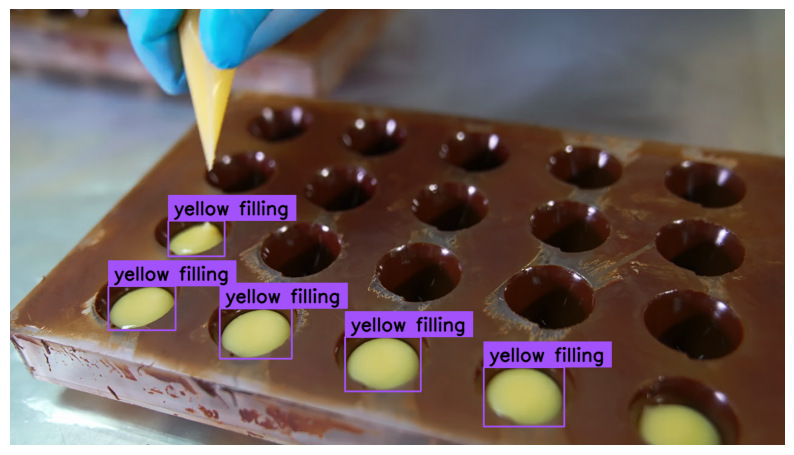

In [26]:
detections = detections[(detections.area / frame_area) < 0.10]

annotated_image = frame.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

## Final Result

Finally, we are ready to process our entire video. Now in truth we can appreciate the speed of YOLO-World.

In [27]:
TARGET_VIDEO_PATH = f"{HOME}/yellow-filling-output.mp4"

In [28]:
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

width, height = video_info.resolution_wh
frame_area = width * height
frame_area

with sv.VideoSink(target_path=TARGET_VIDEO_PATH, video_info=video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        results = model.infer(frame, confidence=0.002)
        detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)
        detections = detections[(detections.area / frame_area) < 0.10]

        annotated_frame = frame.copy()
        annotated_frame = BOUNDING_BOX_ANNOTATOR.annotate(annotated_frame, detections)
        annotated_frame = LABEL_ANNOTATOR.annotate(annotated_frame, detections)
        sink.write_frame(annotated_frame)

100%|██████████| 442/442 [00:32<00:00, 13.52it/s]


 Keep in mind that the video preview below works only in the web version of the cookbooks and not in Google Colab.

<video controls>
    <source
        src="https://storage.googleapis.com/com-roboflow-marketing/supervision/cookbooks/yellow-filling-output-1280x720.mp4"
        type="video/mp4"
    >
</video>

In [45]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture("/content/yellow-filling-output.mp4")
width  = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))   # float `width`
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'MP4V') #codec
out = cv.VideoWriter('/content/yellow-filling-output-final.mp4', fourcc, 20.0, (width,  height))
counter=0
while cap.isOpened():
    ret, frame = cap.read()
    counter+=1
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
print(counter)
cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...
443


In [54]:
import imageio
import matplotlib.pyplot as plt  # Added import statement for plt
import matplotlib.animation as animation
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(3,3))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=100, repeat_delay=1000)

    plt.close()
    return anime

def read_video_chunks(filename, chunk_size=500):
    reader = imageio.get_reader(filename)
    chunks = []
    for i, im in enumerate(reader):
        if i % chunk_size == 0:
            if chunks:
                yield chunks
                chunks = []
        chunks.append(im)
    if chunks:
        yield chunks

# Load video in chunks
video_chunks = read_video_chunks('/content/yellow-filling-output-final.mp4')

# Display each chunk of the video
for chunk in video_chunks:
    HTML(display_video(chunk).to_html5_video())

print("Completed All Video Chunks")

Completed All Video Chunks


In [55]:
HTML(display_video(chunk).to_html5_video())